# SME0104 - Cálculo Numérico
- Professor Antonio Castelo Filho

## Projeto 2 - Aplicações de curvas B-splines em imagens

## Membros

- Felipe Cadavez Oliveira     11208558
- Giovanni Shibaki Camargo    11796444
- João Victor Sene Araujo     11796382
- Lucas Keiti Anbo Mihara     11796472

## Aplicação 2

In [1]:
import cv2
import random
import numpy as np

color_explore = np.zeros((150,150,3), np.uint8)  
color_selected = np.zeros((150,150,3), np.uint8)
global clolor_list
color_list = []
global color
color = []
def  CollorPallete(img_name):

    cv2.namedWindow('color_explore')
    cv2.resizeWindow("color_explore", 50,50);

    cv2.namedWindow('color_selected')
    cv2.resizeWindow("color_selected", 50,50);


    cv2.namedWindow('Pallete')

    pallete_path=img_name


    pallete=cv2.imread(pallete_path)
    def show_color(event,x,y,flags,param):
        global color
        nonlocal pallete
        B=pallete[y,x][0]
        G=pallete[y,x][1]
        R=pallete[y,x][2]
        color_explore [:] = (B,G,R)

        if event == cv2.EVENT_LBUTTONDOWN:
            color_selected [:] = (B,G,R)
            B=color_selected[10,10][0]
            G=color_selected[10,10][1]
            R=color_selected[10,10][2]
            color = [R,G,B]

    cv2.setMouseCallback('Pallete',show_color)

    while (1):

        cv2.imshow('Pallete',pallete)
        cv2.imshow('color_explore',color_explore)
        cv2.imshow('color_selected',color_selected)
        k = cv2.waitKey(1) & 0xFF
        if k== 32:
            color_list.append(color)
            break

    cv2.destroyWindow('color_explore')
    cv2.destroyWindow('color_selected')
    cv2.destroyWindow('Pallete')


ESC = 27
ENTER = 13
global clicks
clicks = []
global RGB
def click_event(event, x, y, flags, params):
    global clicks
    global RGB
 
    if event==cv2.EVENT_RBUTTONDOWN or event==cv2.EVENT_LBUTTONDOWN:
        clicks.append((x,y))

        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, ("."),
                    (x,y), font, 0.6,
                    RGB, 2)
        cv2.imshow('image', img)

def change_color():
    global RGB
    RGB = [random.randint(100,255),random.randint(100,255),random.randint(100,255)]

if __name__=="__main__":
    RGB = [0,0,255]

    img_name = input("Enter the image name: ")
    img = cv2.imread(img_name)

    cv2.imshow('image', img)


    cv2.setMouseCallback('image', click_event)
    click_list = []
    while(1):
        input_key = cv2.waitKey(0)
        if input_key == ESC:
            cv2.destroyAllWindows()
            break
        elif input_key == ENTER:
            change_color()
            click_list.append(clicks)
            CollorPallete(img_name)
            # print (clicks)
            clicks = []
    # close the window
    print(click_list)
    print(color_list)

[[(206, 138), (298, 108), (452, 119), (553, 151), (640, 193), (713, 216), (796, 170), (885, 137), (985, 155), (1051, 212), (1058, 295), (985, 378), (956, 467), (1006, 530), (1100, 619), (1117, 705), (1089, 774), (1020, 808), (945, 783), (894, 765), (844, 771), (818, 799), (789, 834), (768, 859), (725, 876), (676, 884), (636, 861), (606, 837), (573, 800), (544, 770), (520, 737), (496, 718), (465, 708), (433, 721), (411, 753), (362, 775), (315, 798), (283, 790), (254, 772), (226, 743), (197, 716), (172, 688), (164, 643), (161, 600), (185, 552), (209, 512), (238, 476), (271, 447), (289, 406), (287, 375), (266, 340), (199, 297), (170, 251), (167, 216), (192, 168)], [(446, 339), (513, 296), (672, 278), (800, 344), (866, 501), (811, 606), (638, 615), (510, 551), (468, 461)], [(570, 360), (636, 359), (729, 386), (721, 471), (660, 503), (609, 456), (582, 418)]]
[[204, 200, 197], [29, 27, 28], [212, 209, 204]]


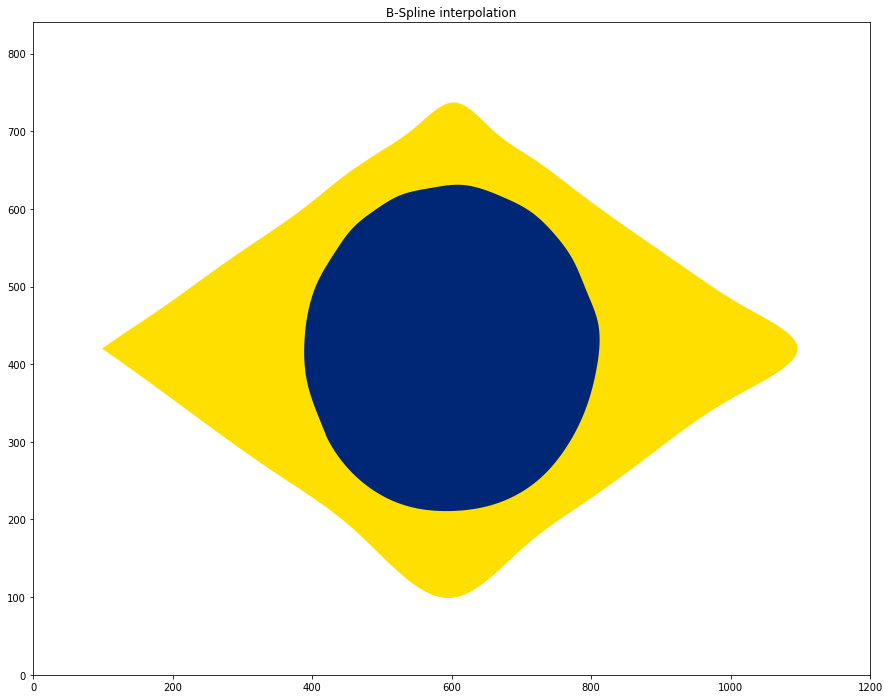

In [12]:
# Gerando as imagens a partir da intercalação de B-splines com os pontos definidos
from scipy import interpolate as interp
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

im = cv2.imread('img/brflag.png')
height = im.shape[0]
width = im.shape[1]

aux = 0
plt.figure()

for points in click_list:
    x = []
    y = []
    for tuple in points:
        x.append(tuple[0])
        y.append(tuple[1])

    # Fechando a curva, isto é, adicionando ao fim o ponto de inicio
    x.insert(len(x), x[0])
    y.insert(len(y), y[0])

    tck,u = interp.splprep([x,y],k=3,s=0)
    u = np.linspace(0,1,num=500,endpoint=True)
    out = interp.splev(u,tck)

    x1 = np.array(out)[0]
    y1 = np.array(out)[1]

    plt.plot(out[0], out[1], color = (0,0,0,0))
    plt.fill_between(x1, y1, facecolor = [(color_list[aux][0]/255,color_list[aux][1]/255,color_list[aux][2]/255)])
    aux += 1
    plt.axis([0, width, 0, height])
    plt.rcParams["figure.figsize"] = [15, 12]
    plt.title('B-Spline interpolation')

plt.show()

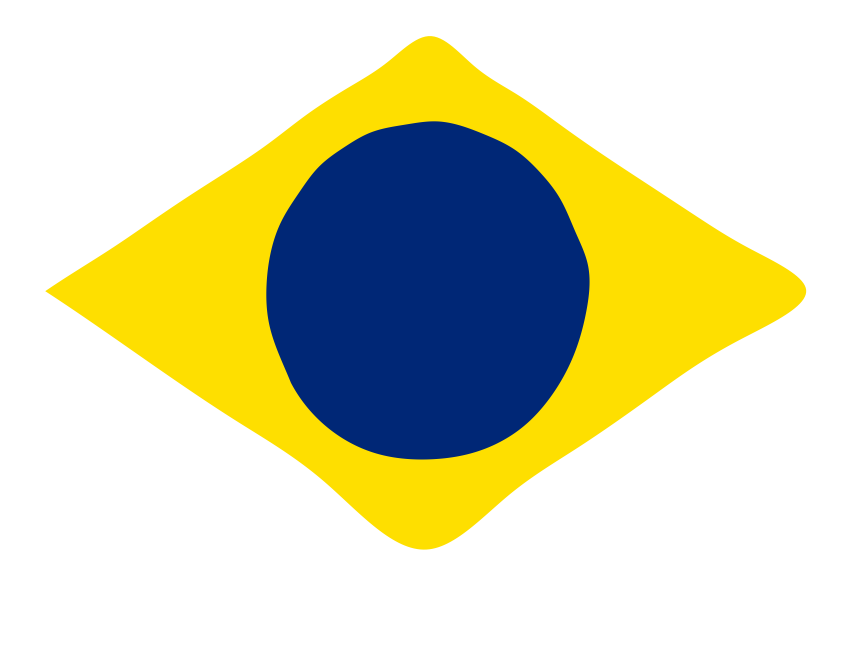

In [15]:
aux = 0
plt.figure()

for points in click_list:
    x = []
    y = []
    for tuple in points:
        x.append(tuple[0])
        y.append(tuple[1])

    # Fechando a curva, isto é, adicionando ao fim o ponto de inicio
    x.insert(len(x), x[0])
    y.insert(len(y), y[0])

    tck,u = interp.splprep([x,y],k=3,s=0)
    u = np.linspace(0,1,num=500,endpoint=True)
    out = interp.splev(u,tck)

    x1 = np.array(out)[0]
    y1 = np.array(out)[1]

    plt.plot(out[0], out[1], color = (0,0,0,0))
    plt.fill_between(x1, y1, facecolor = [(color_list[aux][0]/255,color_list[aux][1]/255,color_list[aux][2]/255)])
    aux += 1
    plt.axis('off')
    plt.rcParams["figure.figsize"] = [15, 12]

plt.savefig("brasil.png", transparent=True)